<a href="https://colab.research.google.com/github/ZnFn/ML-mini-projects/blob/main/Smoker-Or-Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenge of the Week - ML Workflow** 
---
## Case Study: Classifying Smokers vs Non Smokers

**Objective:**

In this challenge, you will work on a dataset that you saw during week 1 but this time with different aspect. Your goal is not only to make a prediction, it is to make a prediction with the best possible way. So you will be building, evaluating, and improving your model.


## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

Our problem would be to predict if a person is smoker or not based on all the other features in the dataset.

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models. We need from it train_test_split and LogisticRegression Functions

In [ ]:
#Test Your Zaka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### Read & visualize data
To load the data to our code, we use **pandas** module, more specifically, the **read_csv** function. Print the head of your dataset.

In [ ]:
#Test Your Zaka
!git clone https://github.com/zaka-ai/medical-cost-prediction
%cd medical-cost-prediction/data/
df = pd.read_csv('insurance.csv')
df.head()

Cloning into 'medical-cost-prediction'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 18 (delta 2), reused 15 (delta 2), pack-reused 0
Unpacking objects: 100% (18/18), done.
/content/medical-cost-prediction/data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

**Task:** how many rows & columns in our dataset

In [ ]:
#Test Your Zaka
rows= df.shape[0]
cols= df.shape[1]
print('There are {} rows and {} columns'.format(rows,cols))

There are 1338 rows and 7 columns


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [ ]:
#Test Your Zaka
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [ ]:
#Test Your Zaka
df.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Data Imbalance Checking

First, let's see how many smokers vs non-smokers we have.

In [ ]:
#Test Your Zaka
smokers = df[(df.smoker == "yes")]
non_smokers = df[(df.smoker == "no")]
print('There are {} smokers and {} non-smokers.'.format(smokers.shape[0], non_smokers.shape[0]))

There are 274 smokers and 1064 non-smokers.


We have an imbalance that we will fix later.

Let's see how much each feature tells us about a person being  a smoker or not.
For each of your numerical features, plot the distribution for the smokers and the non smokers case. 

Text(0.5, 1.0, 'Distribution of charges')

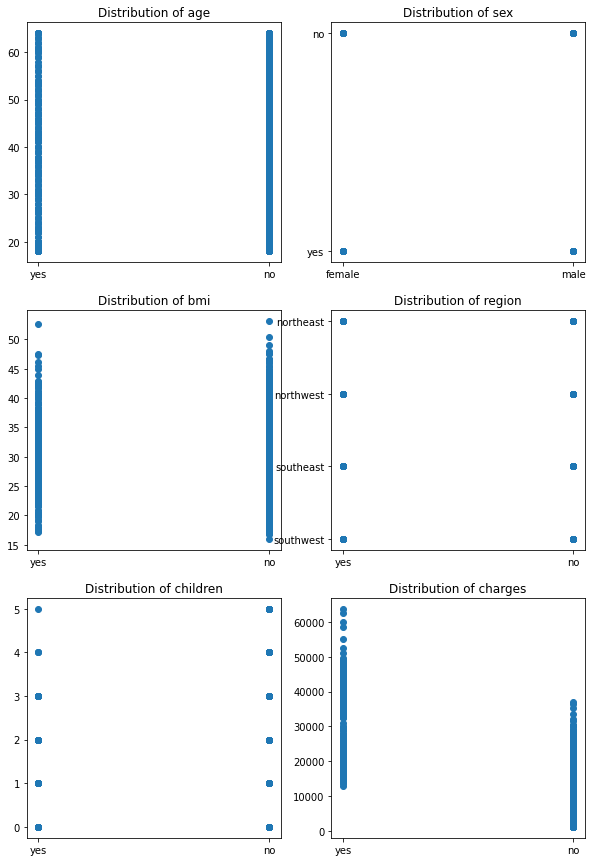

In [ ]:
#Test Your Zaka
fig = plt.figure(figsize=(10,15))
ax = plt.subplot(321)
ax.scatter(df['smoker'],df['age'])
plt.title("Distribution of age")
ax = plt.subplot(322)
ax.scatter(df['sex'], df['smoker'])
plt.title("Distribution of sex")
ax = plt.subplot(323)
ax.scatter(df['smoker'],df['bmi'])
plt.title("Distribution of bmi")
ax = plt.subplot(324)
ax.scatter(df['smoker'],df['region'])
plt.title("Distribution of region")
ax = plt.subplot(325)
plt.scatter(df['smoker'],df['children'])
plt.title("Distribution of children")
ax = plt.subplot(326)
ax.scatter(df['smoker'],df['charges'])
plt.title("Distribution of charges")


WHat do you think is the feature that tells us the most about a person being smoker or not?

**[Share Your Zaka here]**

**Charges**

Now let's see if the gender influences being a smoker or not.
<br>Hint: You can use crosstabbing and then plot distributions

Text(0.5, 1.0, 'Distribution of Gender')

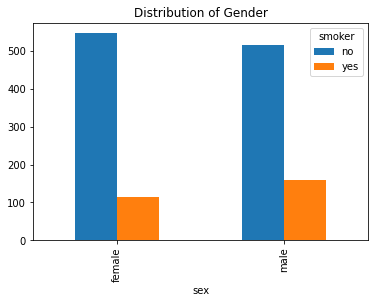

In [ ]:
#Test Your Zaka
gender = pd.crosstab(df['sex'], df['smoker'])
gender.plot(kind='bar')
plt.title("Distribution of Gender")

Do you think the gender has an effect on smoking according to your results?

**[Share Your Zaka here]**

**No the results are quite similar for males and females**

Do the same for the column 'region'

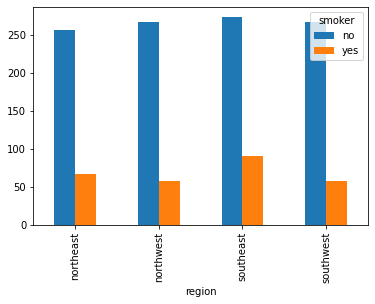

In [ ]:
#Test Your Zaka
region = pd.crosstab(df['region'], df['smoker'])
region.plot(kind='bar')

## 3. Data Preprocessing
"Garbage in, garbage out". 

Data should be preprocessed and cleaned to get rid of noisy data. 
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



 Let's start by seeing if we have missing data.

In [ ]:
#Test Your Zaka
df.isnull().sum()

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64

Drop rows with missing values, and make sure you have no nulls anymore.

In [ ]:
#Test Your Zaka
df = df.dropna()
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

See the type of each of your columns

In [ ]:
#Test Your Zaka
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB


#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



In [ ]:
#Test Your Zaka
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


And now the smokers column

In [ ]:
#Test Your Zaka
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['smoker'] = le.fit_transform(df['smoker'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


And now the Region Column

In [ ]:
#Test Your Zaka
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### Normalization

Let's scale all the columns by dividing by the maximum

In [ ]:
#Test Your Zaka
max = df.max()
df = df.divide(max)

## 4. Model Training & Testing



#### Data splits

Before training, we need to split data into training (80%) & testing (20%), and fix the random_state parameter to 42 <br>Print the shapes of your training and testing data.

In [ ]:
#Test Your Zaka
x = df.iloc[: , df.columns!='smoker'].values
y = df.iloc[:,-3].values  
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1068, 6) (267, 6)
(1068,) (267,)


#### Logistic Regression Modeling


Define the logistic Regression model, and fit it on the training data

In [ ]:
#Test Your Zaka
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

#### Evaluation

Evaluate your model on the testing data, and compute: Accuracy, Precision, Recall and F1 score

In [ ]:
#Test Your Zaka
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pred= model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
print("Accuracy:", accuracy,
      "\nPrecision:",precision,
      "\nRecall:", recall,
      "\nF1 Score:", f1)

Accuracy: 0.898876404494382 
Precision: 0.9523809523809523 
Recall: 0.6153846153846154 
F1 Score: 0.7476635514018692


Which metrics you think can be improved?


**[Share your Zaka here]**

**Recall and F1**

##5. Model Improvement

Now we will try to improve the model that we built.

####Handle data Imbalance

Plot a histogram that shows the numbers of smokers and non smokers

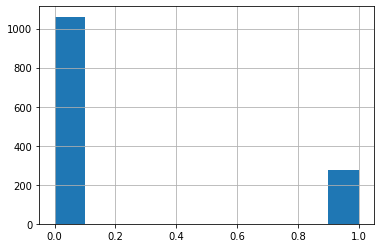

In [ ]:
#Test Your Zaka
df['smoker'].hist()

We can see that we have a clearly imbalanced dataset. To handle it, we choose to do 2 steps:
* Oversampling the minority class with a factor of 0.5
* Undersampling the majority class to obtain the same number in the 2 classes
<br>
We do that by using the RandomOverSaampler and RandomUnderSampler from the imblearn library.

In [ ]:
#Test Your Zaka
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=1)
X, Y = over.fit_resample(x, y)
x_new, y_new = under.fit_resample(X,Y)
print(x_new.shape, y_new.shape)

(1060, 6) (1060,)


PipelinePlot a new histogram on the new data we have.

Text(0.5, 1.0, 'Distribution after sampling')

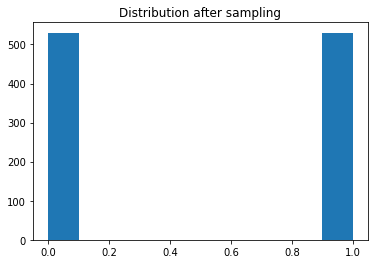

In [ ]:
#Test Your Zaka
plt.hist(y_new)
plt.title("Distribution after sampling")

Split the new data you obtained (80%, 20%), and build a Logistic Regression mode, and fit it on this data. Fix the random_state at 42

In [ ]:
#Test Your Zaka
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
logmodel = LogisticRegression().fit(x_train1, y_train1)

Asses your model on the testing data, and Compute the same metrics you computed before

In [ ]:
#Test Your Zaka
pred1 = logmodel.predict(x_test1)
accuracy = accuracy_score(y_test1, pred1)
precision = precision_score(y_test1, pred1)
recall = recall_score(y_test1, pred1)
f1 = f1_score(y_test1, pred1)
print("Accuracy:", accuracy,
      "\nPrecision:",precision,
      "\nRecall:", recall,
      "\nF1 Score:", f1)

Accuracy: 0.9433962264150944 
Precision: 0.8918918918918919 
Recall: 1.0 
F1 Score: 0.9428571428571428


We can see how much our scores got better when we balanced our dataset.

####Regularization with Hyperparameter Tuning

We will be tuning the hyperparameter C in the logistic regression model that we used. This hyperparameter represents regularization.
<br><img src="https://equatio-api.texthelp.com/svg/C%5C%20%3D%5C%20%5Cfrac%7B1%7D%7B%5Clambda%7D" alt="C equals 1 over lamda">

The possible values of C will be: [0.1, 1, 10, 100, 1000]

We will also know have to decide what type of regularization we will use: L1, or L2.

Since we have several parameters to tune, we will be doing what we call a GridSearch, to search for the best model having the best pair of hyperparameters.
We will be doing a 5 folds cross validation

Note: Specify the solver='liblinear' in your LogisticRegression model, and this is because other solvers do not support L1 regularization.

Print the best score and the best parameters

In [ ]:
#Test Your Zaka
from sklearn.model_selection import GridSearchCV
param_grid =[
  {'penalty':['l1','l2'],
   'C':[0.1, 1, 10, 100, 1000],
   'solver':['liblinear']
  }]
clf = GridSearchCV(logmodel, param_grid=param_grid, cv=5)
best_clf = clf.fit(x_train1, y_train1)
best_clf.best_estimator_

LogisticRegression(C=100, penalty='l1', solver='liblinear')

Let's assess the model's performance in general for the best specified hyperparameters using the same metrics we used earlier.

In [ ]:
#Test Your Zaka
model2 = LogisticRegression(penalty='l1', C=10, solver='liblinear').fit(x_train1, y_train1)
pred3 = model2.predict(x_test1)
accuracy = accuracy_score(y_test1, pred3)
precision = precision_score(y_test1, pred3)
recall = recall_score(y_test1, pred3)
f1 = f1_score(y_test1, pred3)
print("Accuracy:", accuracy,
      "\nPrecision:",precision,
      "\nRecall:", recall,
      "\nF1 Score:", f1)

Accuracy: 0.9481132075471698 
Precision: 0.9 
Recall: 1.0 
F1 Score: 0.9473684210526316


We can see that the results improved compared to the last model we built.

####AdaBoost Classifier

Now, we will work on improving our model, but this time through using ensemble methods, and what we will use for today is Adaboost.

AdaBoost is a boosting ensemble method that relies on the boosting concepts that we learned about during the week. 
In Adaboost, each model is learning to correct the previous model's mistakes (misclassified examples). After that, each model will have a weight that depends on how well it performed on the training data. And after that, different results are aggregated based on weighted averaging.

Create an AdaBoostClassifier Model from sklearn library with n_estimators=10, and fit it on the training data you have.

In [ ]:
#Test Your Zaka
from sklearn.ensemble import AdaBoostClassifier
clf1 = AdaBoostClassifier(n_estimators=10).fit(x_train1, y_train1)

Asses the performance of your model on the testing data, and compute the same metrics we computed earlier.

In [ ]:
#Test Your Zaka
apred = clf1.predict(x_test1)
accuracy = accuracy_score(y_test1, apred)
precision = precision_score(y_test1, apred)
recall = recall_score(y_test1, apred)
f1 = f1_score(y_test1, apred)
print("Accuracy:", accuracy,
      "\nPrecision:",precision,
      "\nRecall:", recall,
      "\nF1 Score:", f1)

Accuracy: 0.9575471698113207 
Precision: 0.9166666666666666 
Recall: 1.0 
F1 Score: 0.9565217391304348


**BONUS:** One thing you can try on your own, is to tune the Hyperparameters of the Adaboost algorithm, and build an even more powerful model :)

In [ ]:
param_grid =[
  {'n_estimators': [10,500,1000,2500],
   'learning_rate': [0.001,0.01,0.1],
   'algorithm' : ['SAMME', 'SAMME.R'],
  }]
tuned_clf = GridSearchCV(clf1, param_grid=param_grid, cv=5)
best_tuned_clf= tuned_clf.fit(x_train1, y_train1) 
best_tuned_clf.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000)

In [ ]:
Model =AdaBoostClassifier(n_estimators=1000, learning_rate=0.1).fit(x_train1, y_train1)
prediction = Model.predict(x_test1)
accuracy = accuracy_score(y_test1, prediction)
precision = precision_score(y_test1, prediction)
recall = recall_score(y_test1, prediction)
f1 = f1_score(y_test1, prediction)
print("Accuracy:", accuracy,
      "\nPrecision:",precision,
      "\nRecall:", recall,
      "\nF1 Score:", f1)

Accuracy: 0.9575471698113207 
Precision: 0.9166666666666666 
Recall: 1.0 
F1 Score: 0.9565217391304348
